In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishna1rai","key":"3ec4d7fb4865577d27640be942a9afc8"}'}

In [ ]:
import os
import shutil

# Create Kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the kaggle.json file
shutil.move("kaggle.json", "/root/.kaggle/")

# Set permissions to avoid permission errors
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d nabayansaha/gc-data-compiled

Dataset URL: https://www.kaggle.com/datasets/nabayansaha/gc-data-compiled
License(s): unknown


In [ ]:
import zipfile

# Extract the dataset
with zipfile.ZipFile("gc-data-compiled.zip", 'r') as zip_ref:
    zip_ref.extractall("gc_data")

In [ ]:
import os
os.listdir("gc_data")

['compiled_data_gc.csv']

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gc_data/compiled_data_gc.csv")

In [ ]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn Names:", df.columns.tolist())

# First few rows
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data types of columns
print("\nData types of columns:")
print(df.dtypes)


Shape of dataset: (1580161, 50)

Column Names: ['fsn_id', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 'order_payment_type', 'sla', 'cust_id', 'pincode', 'product_mrp', 'product_procurement_sla', 'date', 'time', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'is_holiday', 'is_sale', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'Season', 'list_price', 'discount', 'is_luxury', 'NPS', 'Stock Index', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online Marketing', 'Affiliates', 'SEM', 'Radio', 'Other', 'payday_week', 'Total Investment', 'Year']

First 5 rows:
             fsn_id     order_id  order_item_id    gmv  units  deliverybdays  \
0  ACCE5FQXQNRRGYNJ  165165918.0    209727476.0  385.0      1              0   
1  REME4AC

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Load the dataset
df = pd.read_csv('/content/gc_data/compiled_data_gc.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract temporal features
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Week_Number'] = df.groupby(['Year', 'Month'])['date'].transform(
    lambda x: pd.cut(x.dt.day, bins=[0, 7, 14, 21, 32], labels=[1, 2, 3, 4])
)

def safe_division(a, b):
    return a / b if b != 0 else 0

# Weekly aggregation with proper date handling
weekly_data = df.groupby(['Year', 'Month', 'Week_Number']).agg({
    'gmv': 'sum',
    'deliverybdays': 'sum',
    'deliverycdays': 'sum',
    'sla': 'mean',
    'is_holiday': lambda x: x.groupby(df.loc[x.index, 'date']).max().sum(),
    'is_sale': lambda x: x.groupby(df.loc[x.index, 'date']).max().sum(),
    'Max Temp (°C)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Min Temp (°C)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Mean Temp (°C)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Heat Deg Days (°C)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Cool Deg Days (°C)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Total Rain (mm)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Total Snow (cm)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Total Precip (mm)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'Snow on Grnd (cm)': lambda x: x.groupby(df.loc[x.index, 'date']).mean().mean(),
    'NPS': 'mean',
    'Stock Index': 'mean',
    'TV': 'mean',
    'Digital': 'mean',
    'Sponsorship': 'mean',
    'Content Marketing': 'mean',
    'Online Marketing': 'mean',
    'Affiliates': 'mean',
    'SEM': 'mean',
    'Radio': 'mean',
    'Other': 'mean',
    'date': 'nunique'
}).reset_index()

# Calculate delivery days mean correctly
weekly_data['delivery_days_mean'] = weekly_data.apply(
    lambda row: safe_division(
        (row['deliverybdays'] + row['deliverycdays']),
        row['date']
    ), axis=1
)

# Divide specified columns by 4
cols_to_divide = ['NPS', 'Stock Index', 'TV', 'Digital', 'Sponsorship',
                 'Content Marketing', 'Online Marketing', 'Affiliates',
                 'SEM', 'Radio', 'Other']
weekly_data[cols_to_divide] = weekly_data[cols_to_divide] / 4

# Clean up final columns
weekly_data.drop(['deliverybdays', 'deliverycdays', 'date'], axis=1, inplace=True)


<ipython-input-9-2a7cfcf7dc58>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_data = df.groupby(['Year', 'Month', 'Week_Number']).agg({


In [ ]:
weekly_data.columns

Index(['Year', 'Month', 'Week_Number', 'gmv', 'sla', 'is_holiday', 'is_sale',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS',
       'Stock Index', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online Marketing', 'Affiliates', 'SEM', 'Radio', 'Other',
       'delivery_days_mean'],
      dtype='object')

In [ ]:
weekly_data.head()

,Year,Month,Week_Number,gmv,sla,is_holiday,is_sale,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,TV,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other,delivery_days_mean
0,2023,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2023,1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2023,1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2023,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2023,2,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
print("Total number of rows after week-wise grouping:", weekly_data.shape[0])

Total number of rows after week-wise grouping: 96


In [ ]:
df_weekly = weekly_data.dropna()

In [ ]:
df_weekly.head()


,Year,Month,Week_Number,gmv,sla,is_holiday,is_sale,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,TV,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other,delivery_days_mean
24,2023,7,1,8.615373e+06,5.392712,1.0,0.0,26.083333,14.333333,20.216667,...,0.05,0.625,1.850,0.0,0.325,0.125,1.250,0.0,0.0,60.333333
25,2023,7,2,4.520633e+07,6.628048,0.0,0.0,25.571429,16.035714,20.828571,...,0.05,0.625,1.850,0.0,0.325,0.125,1.250,0.0,0.0,4.857143
26,2023,7,3,4.694887e+07,5.938403,0.0,2.0,28.857143,16.535714,22.707143,...,0.05,0.625,1.850,0.0,0.325,0.125,1.250,0.0,0.0,17.857143
27,2023,7,4,6.081493e+07,6.269980,0.0,0.0,30.750000,17.500000,24.105000,...,0.05,0.625,1.850,0.0,0.325,0.125,1.250,0.0,0.0,7.400000
28,2023,8,1,2.218800e+04,6.178571,1.0,0.0,29.000000,15.660714,22.182143,...,0.00,0.325,0.275,0.0,0.025,0.025,0.625,0.0,0.0,0.000000


In [ ]:
# Save the modified dataset to a new CSV file
df_weekly.to_csv('weekly_dataset.csv', index=False)

In [ ]:
df_weekly.describe()

,Year,Month,gmv,sla,is_holiday,is_sale,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),...,TV,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other,delivery_days_mean
count,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2023.500000,6.500000,8.066838e+07,5.744543,0.416667,0.916667,17.327341,6.535710,12.020010,3.073709,...,0.925000,0.620833,7.612500,0.166667,4.035417,1.279167,1.897917,0.097917,1.000000,8865.022991
std,0.505291,3.488583,4.606954e+07,0.427680,0.613096,1.673744,9.731839,8.851313,9.105583,3.517330,...,0.650205,0.791029,6.345324,0.228392,2.045635,0.618495,1.923828,0.199323,2.088749,15352.340660
min,2023.000000,1.000000,1.148100e+04,4.090909,0.000000,0.000000,-4.263393,-12.133929,-8.227679,0.000000,...,0.000000,0.125000,0.275000,0.000000,0.025000,0.025000,0.625000,0.000000,0.000000,0.000000
25%,2023.000000,3.750000,6.074143e+07,5.519559,0.000000,0.000000,8.482143,-1.407087,3.850893,0.000000,...,0.406250,0.300000,2.656250,0.000000,3.575000,1.112500,1.050000,0.000000,0.000000,10.864286
50%,2023.500000,6.500000,7.569194e+07,5.729757,0.000000,0.000000,18.058036,6.508929,13.115268,2.182857,...,1.012500,0.350000,6.162500,0.125000,4.750000,1.587500,1.275000,0.000000,0.000000,56.166667
75%,2024.000000,9.250000,1.028953e+08,6.051620,1.000000,1.250000,26.232143,15.087705,20.397321,5.085714,...,1.312500,0.550000,11.343750,0.206250,5.650000,1.700000,1.593750,0.056250,0.312500,10502.646429
max,2024.000000,12.000000,2.694305e+08,6.628048,2.000000,7.000000,31.291667,19.291667,24.750000,14.614286,...,2.325000,3.150000,21.175000,0.850000,6.100000,1.850000,7.975000,0.675000,6.775000,48890.111111


In [ ]:
import numpy as np

In [ ]:
df_new = df_weekly.copy()

In [ ]:
df_new['log_gmv'] = np.log(df_new['gmv'])

In [ ]:
df_new.describe()

,Year,Month,gmv,sla,is_holiday,is_sale,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),...,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other,delivery_days_mean,log_gmv
count,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2023.500000,6.500000,8.066838e+07,5.744543,0.416667,0.916667,17.327341,6.535710,12.020010,3.073709,...,0.620833,7.612500,0.166667,4.035417,1.279167,1.897917,0.097917,1.000000,8865.022991,17.542248
std,0.505291,3.488583,4.606954e+07,0.427680,0.613096,1.673744,9.731839,8.851313,9.105583,3.517330,...,0.791029,6.345324,0.228392,2.045635,0.618495,1.923828,0.199323,2.088749,15352.340660,2.260923
min,2023.000000,1.000000,1.148100e+04,4.090909,0.000000,0.000000,-4.263393,-12.133929,-8.227679,0.000000,...,0.125000,0.275000,0.000000,0.025000,0.025000,0.625000,0.000000,0.000000,0.000000,9.348449
25%,2023.000000,3.750000,6.074143e+07,5.519559,0.000000,0.000000,8.482143,-1.407087,3.850893,0.000000,...,0.300000,2.656250,0.000000,3.575000,1.112500,1.050000,0.000000,0.000000,10.864286,17.922134
50%,2023.500000,6.500000,7.569194e+07,5.729757,0.000000,0.000000,18.058036,6.508929,13.115268,2.182857,...,0.350000,6.162500,0.125000,4.750000,1.587500,1.275000,0.000000,0.000000,56.166667,18.142182
75%,2024.000000,9.250000,1.028953e+08,6.051620,1.000000,1.250000,26.232143,15.087705,20.397321,5.085714,...,0.550000,11.343750,0.206250,5.650000,1.700000,1.593750,0.056250,0.312500,10502.646429,18.449184
max,2024.000000,12.000000,2.694305e+08,6.628048,2.000000,7.000000,31.291667,19.291667,24.750000,14.614286,...,3.150000,21.175000,0.850000,6.100000,1.850000,7.975000,0.675000,6.775000,48890.111111,19.411821


## Model Training

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_new['gmv'])  # Use 'log_gmv' if applying log transformation
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("Data is stationary (Reject Null Hypothesis)")
else:
    print("Data is non-stationary (Fail to Reject Null Hypothesis)")


ADF Statistic: -4.118380977462324
p-value: 0.0009029428471627372
Data is stationary (Reject Null Hypothesis)


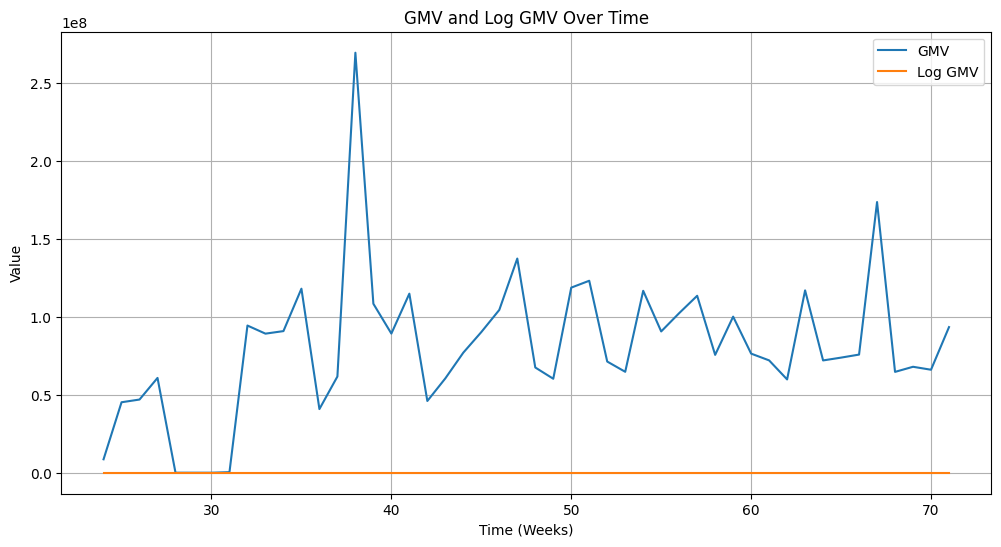

In [ ]:
# prompt: i want to generate the graph for above stationary test

import matplotlib.pyplot as plt

# Assuming 'df_new' is your DataFrame with 'gmv' and 'log_gmv' columns

plt.figure(figsize=(12, 6))
plt.plot(df_new['gmv'], label='GMV')
plt.plot(df_new['log_gmv'], label='Log GMV')
plt.xlabel('Time (Weeks)')
plt.ylabel('Value')
plt.title('GMV and Log GMV Over Time')
plt.legend()
plt.grid(True)
plt.show()



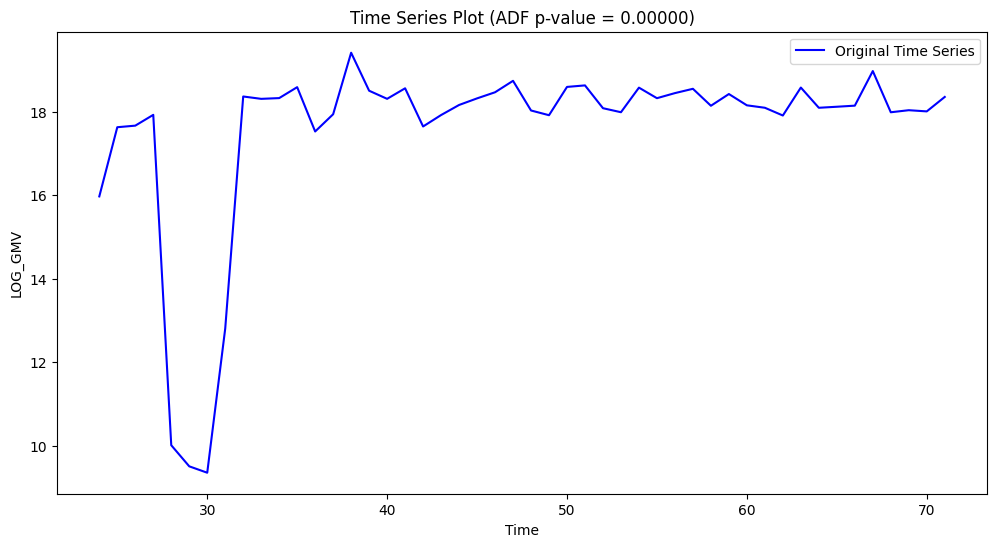

✅ Data is stationary (Reject Null Hypothesis)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(df_new['log_gmv'])  # Use 'log_gmv' if using log transformation

# Extract ADF Statistics and p-value
adf_stat, p_value = result[0], result[1]

# Plot the Time Series
plt.figure(figsize=(12, 6))
plt.plot(df_new['log_gmv'], label="Original Time Series", color='blue')
plt.title(f"Time Series Plot (ADF p-value = {p_value:.5f})")
plt.xlabel("Time")
plt.ylabel("LOG_GMV")
plt.legend()
plt.show()

# Check if data is stationary
if p_value < 0.05:
    print("✅ Data is stationary (Reject Null Hypothesis)")
else:
    print("❌ Data is non-stationary (Fail to Reject Null Hypothesis)")

# If non-stationary, apply first differencing and plot again
if p_value >= 0.05:
    df_new['gmv_diff'] = df_new['log_gmv'].diff().dropna()

    # Re-run ADF Test on differenced data
    result_diff = adfuller(df_new['gmv_diff'].dropna())
    p_value_diff = result_diff[1]

    plt.figure(figsize=(12, 6))
    plt.plot(df_new['gmv_diff'], label="Differenced Time Series", color='green')
    plt.title(f"First Differenced Time Series (ADF p-value = {p_value_diff:.5f})")
    plt.xlabel("Time")
    plt.ylabel("Differenced GMV")
    plt.legend()
    plt.show()

    # Check stationarity again
    if p_value_diff < 0.05:
        print("✅ Data is stationary after differencing (Reject Null Hypothesis)")
    else:
        print("❌ Data is still non-stationary (Consider further differencing or transformations)")


In [ ]:
df_new.columns

Index(['Year', 'Month', 'Week_Number', 'gmv', 'sla', 'is_holiday', 'is_sale',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS',
       'Stock Index', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online Marketing', 'Affiliates', 'SEM', 'Radio', 'Other',
       'delivery_days_mean', 'log_gmv'],
      dtype='object')

In [ ]:
X=df_new[['sla', 'is_holiday', 'is_sale',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS',
       'Stock Index', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online Marketing', 'Affiliates', 'SEM', 'Radio', 'Other',
       'delivery_days_mean']]

y=df_new['log_gmv']

In [ ]:
len(y)

48

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating sample data
np.random.seed(42)
# X = np.random.rand(100, 1) * 10  # Feature
# y = 5 * X + np.random.randn(100, 1) * 3  # Target with noise

# Splitting dataset
X_train, X_test, y_train, y_test = X[:42],X[42:],y[:42],y[42:]
# Model training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)
# print(len(X_test))
# Model evaluation
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


R² Score: -25.587325396399702
MSE: 3.190546856297241


In [ ]:
# prompt: give me the variance of y

variance_y = np.var(y)
print(f"Variance of y: {variance_y}")


Variance of y: 5.005277329044068


In [ ]:
lin_reg.coef_

array([ 5.69223046e-01, -2.10309312e-01,  1.96929248e-01, -7.00256391e-02,
       -1.29011366e-01,  2.44296853e-01,  6.24423946e-02, -7.41539006e-02,
       -1.56075021e-01, -2.29624667e-01,  1.14638032e-01, -2.26877609e-02,
        4.63617603e-01, -1.16937289e-01, -8.93653913e+00,  2.11655068e+01,
        8.08515257e-01, -5.47729389e+01, -7.01055251e+00,  3.43911473e+01,
       -3.15933319e+00,  3.42860655e+01, -2.05607325e+00,  2.84028928e-05])

In [ ]:
y_test

,log_gmv
66,18.143406
67,18.972523
68,17.985052
69,18.034480
70,18.006146
71,18.352506


In [ ]:
X.columns

Index(['sla', 'is_holiday', 'is_sale', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online Marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'delivery_days_mean'],
      dtype='object')

In [ ]:
fractions_coeff=lin_reg.coef_[-10:-1]
rest_coeff=np.array([5.69223046e-01, -2.10309312e-01,  1.96929248e-01, -7.00256391e-02,
       -1.29011366e-01,  2.44296853e-01,  6.24423946e-02, -7.41539006e-02,
       -1.56075021e-01, -2.29624667e-01,  1.14638032e-01, -2.26877609e-02,
        4.63617603e-01, -1.16937289e-01,2.84028928e-05])
fraction_col=['TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online Marketing', 'Affiliates',
       'SEM', 'Radio', 'Other']
rest_col=['sla', 'is_holiday', 'is_sale', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index','delivery_days_mean']


In [ ]:
fractions_coeff


array([ -8.93653913,  21.1655068 ,   0.80851526, -54.77293886,
        -7.01055251,  34.39114733,  -3.15933319,  34.28606547,
        -2.05607325])

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Model evaluation
print(f"Ridge Regression R² Score: {r2_score(y_test, y_pred_ridge)}")
print(f"Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}")


Ridge Regression R² Score: -12.012927361751537
Ridge Regression MSE: 1.561584471783043


In [ ]:
import joblib
joblib.dump(lin_reg, "linear_regression_model.pkl")
print("Model saved successfully!")

# Load model weights
loaded_model = joblib.load("linear_regression_model.pkl")

# Verify loading by checking coefficients
print("Loaded Model Coefficients:", loaded_model.coef_)
print("Loaded Model Intercept:", loaded_model.intercept_)

Model Coefficients: [[4.64231687]]
Model Intercept: [1.3500068]


In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Define features (X) and target variable (y)
X = df_new.drop(columns=['log_gmv'])  # Independent variables
y = df_new['log_gmv']  # Target variable

# Add a constant term (Intercept) to X
X = sm.add_constant(X)

# Fit an OLS Regression Model
model = sm.OLS(y, X).fit()

# Extract Beta Coefficients, Standard Errors, t-Statistics, and p-Values
coefficients = model.params  # Beta coefficients
standard_errors = model.bse  # Standard errors
t_statistics = model.tvalues  # t-statistics
p_values = model.pvalues  # p-values

# Create a DataFrame to display results
t_test_results = pd.DataFrame({
    "Feature": coefficients.index,
    "Beta Coefficient": coefficients.values,
    "Standard Error": standard_errors.values,
    "t-Statistic": t_statistics.values,
    "p-Value": p_values.values
})

# Print the results sorted by p-value (low p-value means high significance)
print(t_test_results.sort_values(by="p-Value"))

               Feature  Beta Coefficient  Standard Error  t-Statistic  \
3          Week_Number      1.701563e-01    8.844969e-02     1.923764   
7              is_sale      1.414918e-01    7.469240e-02     1.894327   
5                  sla      4.762135e-01    2.766076e-01     1.721621   
2                Month     -1.570430e+00    1.007424e+00    -1.558858   
1                 Year      1.132664e-01    8.554720e-02     1.324022   
4                  gmv      4.309473e-09    3.549307e-09     1.214173   
17                 NPS     -1.543094e+01    1.324905e+01    -1.164683   
20             Digital     -2.993209e+01    2.756937e+01    -1.085701   
27               Other     -9.074032e+00    9.257898e+00    -0.980140   
21         Sponsorship     -2.560121e+00    2.654311e+00    -0.964514   
26               Radio      3.124222e+01    3.353423e+01     0.931652   
24          Affiliates     -7.530088e+01    8.175835e+01    -0.921018   
19                  TV      3.257201e+01    3.55150

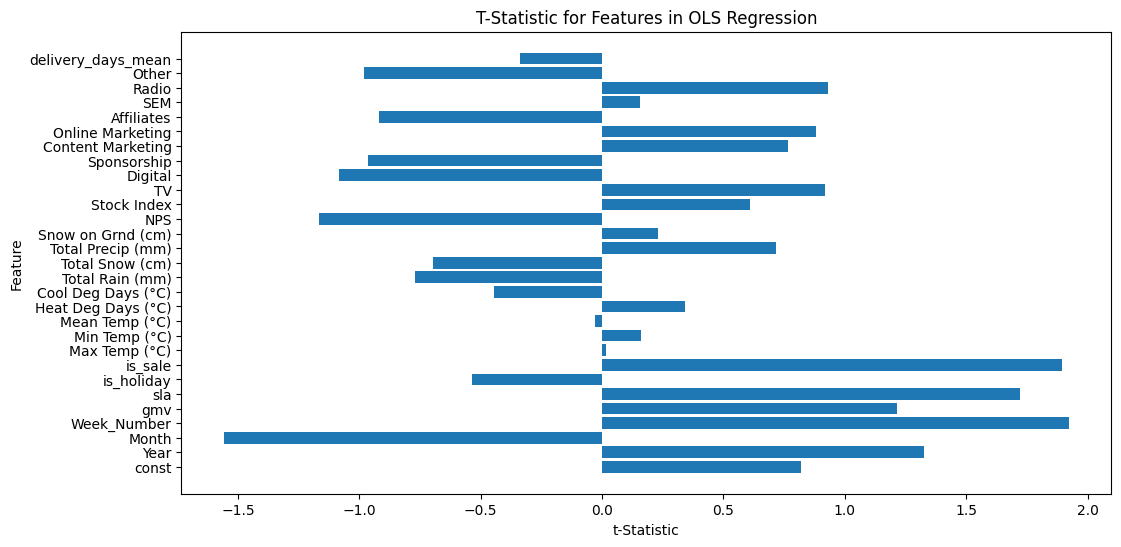

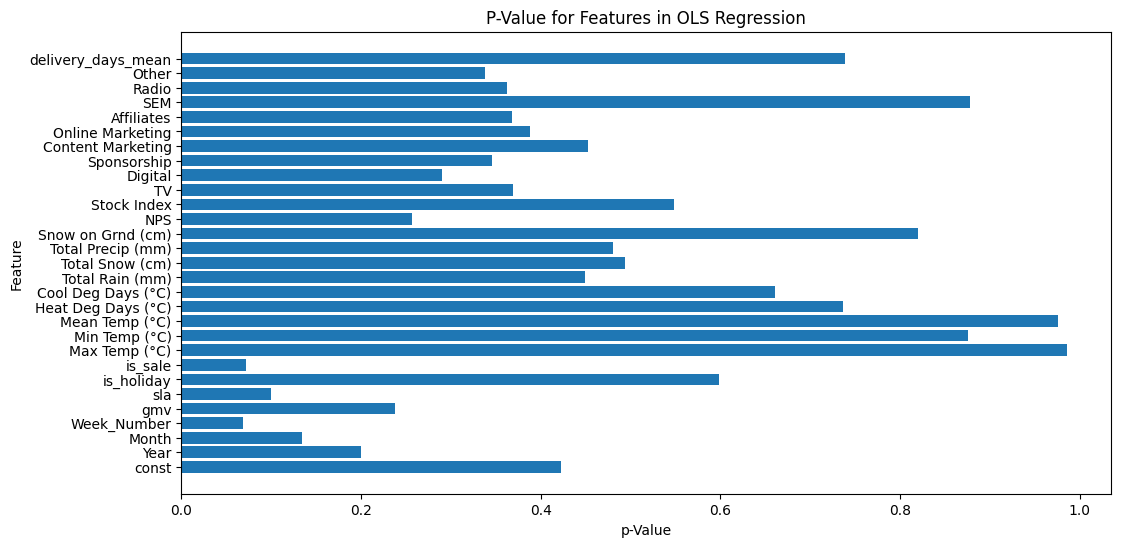

In [ ]:
# prompt: what graph can i plotfrom the above statistical t test

import matplotlib.pyplot as plt

# Assuming t_test_results DataFrame is available as defined in your code

# Plot t-statistic for each feature
plt.figure(figsize=(12, 6))
plt.barh(t_test_results['Feature'], t_test_results['t-Statistic'])
plt.xlabel('t-Statistic')
plt.ylabel('Feature')
plt.title('T-Statistic for Features in OLS Regression')
plt.show()


# Plot p-values for each feature (can also use a logarithmic scale for better visualization)
plt.figure(figsize=(12, 6))
plt.barh(t_test_results['Feature'], t_test_results['p-Value'])
plt.xlabel('p-Value')
plt.ylabel('Feature')
plt.title('P-Value for Features in OLS Regression')
plt.show()


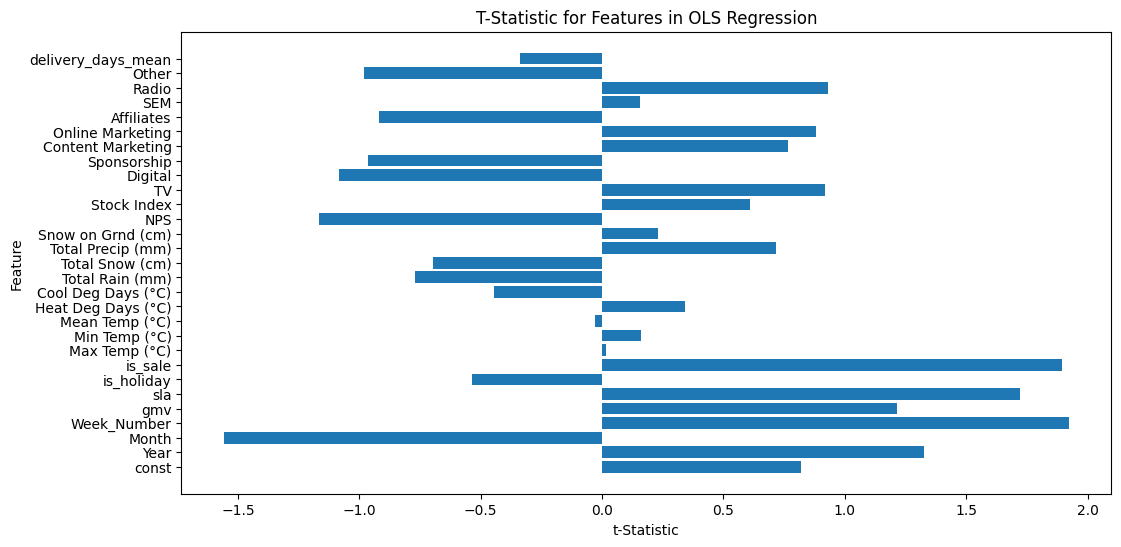

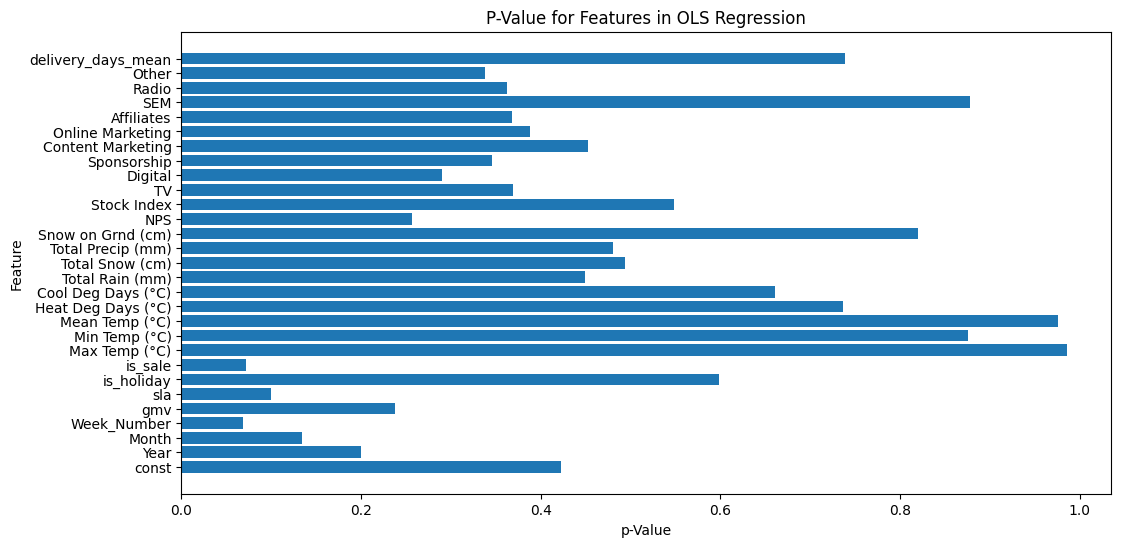

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: i want to save these plots as imahes

# Assuming you have your plots generated using plt.show()

# Save the t-statistic plot as an image
plt.figure(figsize=(12, 6))
plt.barh(t_test_results['Feature'], t_test_results['t-Statistic'])
plt.xlabel('t-Statistic')
plt.ylabel('Feature')
plt.title('T-Statistic for Features in OLS Regression')
plt.savefig('t_statistic_plot.png')  # Save the plot as a PNG image
plt.show()


# Save the p-value plot as an image
plt.figure(figsize=(12, 6))
plt.barh(t_test_results['Feature'], t_test_results['p-Value'])
plt.xlabel('p-Value')
plt.ylabel('Feature')
plt.title('P-Value for Features in OLS Regression')
plt.savefig('p_value_plot.png')  # Save the plot as a PNG image
plt.show()

# Download the images
files.download('t_statistic_plot.png')
files.download('p_value_plot.png')
